In [23]:
import pandas as pd
import numpy as np
from tools import *
import os
import preprocessor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
import warnings
from sklearn.model_selection import train_test_split,cross_val_score,  GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
warnings.catch_warnings()  

catch_warnings()

In [24]:
df = pd.read_csv('data/diabetic_data.csv')

In [25]:

preprocessor_eda=preprocessor.Train_preprocessor('data/mapping_json')
df=preprocessor_eda.transform(df)


c:\Users\mario\OneDrive\Documentos\TAAU\TAAU\preprocessor.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_1'] = df['diag_1'].map(d).astype(int)
c:\Users\mario\OneDrive\Documentos\TAAU\TAAU\preprocessor.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_2'] = df['diag_2'].map(d).astype(int)
c:\Users\mario\OneDrive\Documentos\TAAU\TAAU\preprocessor.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [26]:
df

,gender,diag_1,diag_2,diag_3,insulin,change,diabetesMed,readmitted,sqrt_n_service_uses,medication/day,discharge_disposition_id_home,discharge_disposition_id_hospital,discharge_disposition_id_transfer,admission_type_id_elective,admission_type_id_emergency,admission_type_id_newborn,admission_type_id_traumat,admission_type_id_urgent
2,0,10,2,18,-2,0,1,2,1.732051,6.500000,1,0,0,0,1,0,0,0
3,1,0,2,6,1,1,1,2,0.000000,8.000000,1,0,0,0,1,0,0,0
4,1,1,1,2,0,1,1,2,0.000000,8.000000,1,0,0,0,1,0,0,0
6,1,6,6,18,0,1,1,2,0.000000,5.250000,1,0,0,1,0,0,0,0
8,0,6,6,0,0,1,1,2,0.000000,2.153846,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101334,1,6,9,15,0,1,1,0,0.000000,1.800000,1,0,0,0,1,0,0,0
101342,0,2,1,1,-2,1,1,0,1.000000,4.800000,1,0,0,0,0,0,0,1
101386,1,6,7,6,-2,1,1,0,0.000000,4.750000,1,0,0,0,0,0,0,1
101391,1,6,6,6,0,0,1,0,2.236068,3.800000,1,0,0,0,1,0,0,0


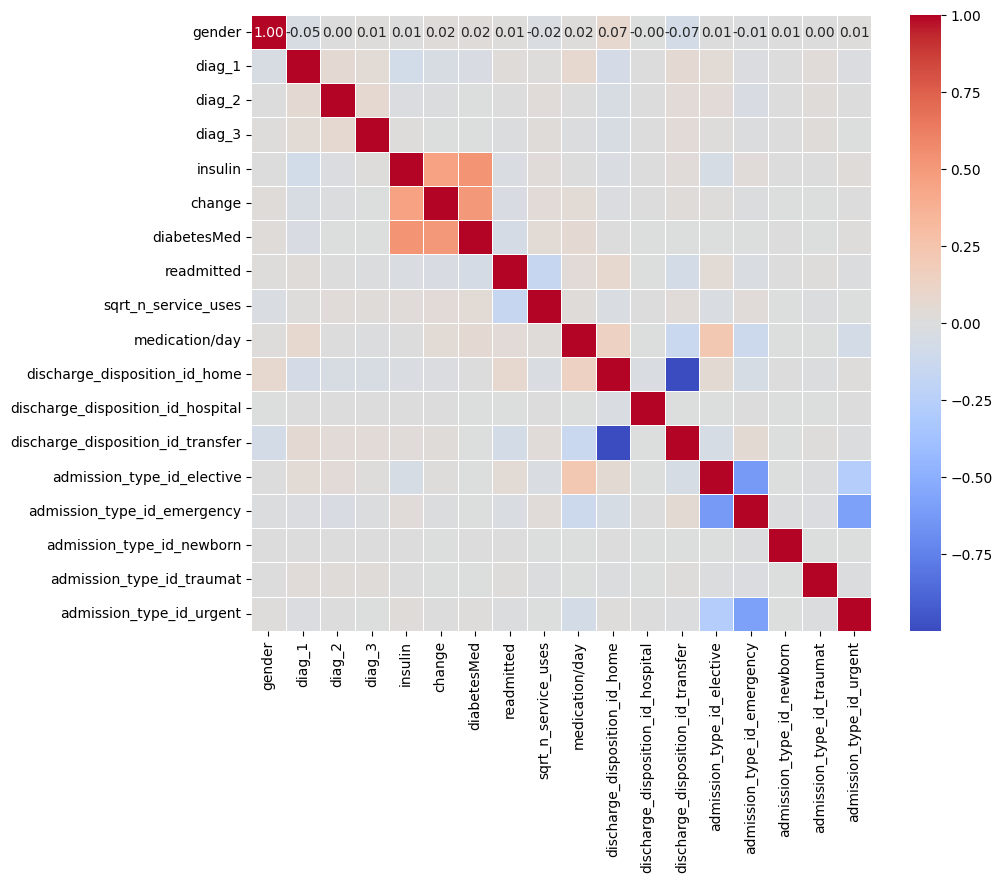

In [27]:
matriz_correlacion = df.corr()

# Ajustando el tamaño de la figura para una mejor visualización
plt.figure(figsize=(10, 8))

# Utilizar Seaborn para una visualización atractiva
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Mostrar el gráfico
plt.show()

<Axes: >

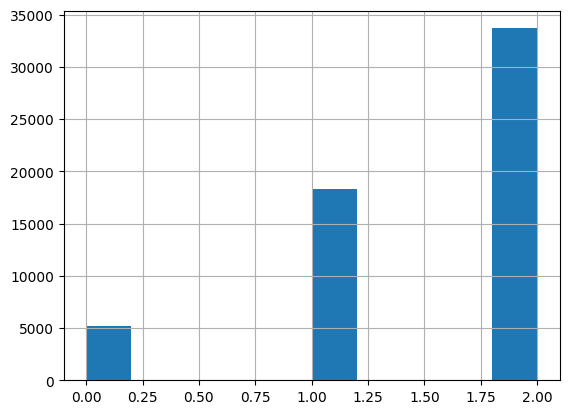

In [28]:
df['readmitted'].hist()

## SPLIT

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57176 entries, 2 to 101667
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             57176 non-null  int32  
 1   diag_1                             57176 non-null  int32  
 2   diag_2                             57176 non-null  int32  
 3   diag_3                             57176 non-null  int32  
 4   insulin                            57176 non-null  int64  
 5   change                             57176 non-null  int64  
 6   diabetesMed                        57176 non-null  int64  
 7   readmitted                         57176 non-null  int32  
 8   sqrt_n_service_uses                57176 non-null  float64
 9   medication/day                     57176 non-null  float64
 10  discharge_disposition_id_home      57176 non-null  uint8  
 11  discharge_disposition_id_hospital  57176 non-null  ui

In [30]:
columns_to_transform=[]
for i in df.columns:
    if df[i].dtype!='int64':
        df[i]=df[i].astype(int)

In [31]:
df.to_csv('data/final_dataframe.csv')

In [32]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split

# Cargar tus datos
# data = tu_dataframe

# Separar las características y la variable objetivo
X = df.drop('readmitted', axis=1)
y = df['readmitted']
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sobremuestreo de la clase minoritaria
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Calcular la nueva distribución de clases después del sobremuestreo
class_distribution = Counter(y_train_resampled)
major_class = max(class_distribution, key=class_distribution.get)
reduced_major_class_count = int(class_distribution[major_class] * 0.75)

# Crear un diccionario para la estrategia de submuestreo
sampling_strategy = {major_class: reduced_major_class_count}

# Submuestreo de la clase mayoritaria
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_resampled, y_train_resampled)

print(f"Distribución de clases después del submuestreo: {Counter(y_train_balanced)}")


Distribución de clases después del submuestreo: Counter({0: 23549, 2: 23549, 1: 17661})


In [33]:
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#Ejemplo de smote con cv
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification, load_breast_cancer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import lightgbm as lgb
classifiers_list = [
  ( 'Baseline',              DummyClassifier() ),
  ( 'Nearest Neighbors (1)', KNeighborsClassifier(1) ),
  ( 'Nearest Neighbors (3)', KNeighborsClassifier(3) ),
  ( 'Nearest Neighbors (5)', KNeighborsClassifier(5) ),
  ( 'Nearest Neighbors (7)', KNeighborsClassifier(7) ),
  ( 'lightGBM',              lgb.LGBMClassifier()    ),
  ( 'Decision Tree',         DecisionTreeClassifier()),
  ( 'Random Forest',         RandomForestClassifier()),
  ( 'Neural Net',            MLPClassifier()         ),
  ( 'AdaBoost',              AdaBoostClassifier()    ),
  ( 'Naive Bayes',           GaussianNB()            ),
  ( 'Logistic Regression',   LogisticRegression()    ),
]






In [34]:
from scipy.stats import wilcoxon
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Suponiendo que 'classifiers_list' es una lista de tuplas con nombre y modelo del clasificador
# Y que X_train, y_train, X_test, y_test ya están definidos

valores_auc = {}

# Entrenar y obtener puntuaciones AUC para cada clasificador
for name, model in classifiers_list:
    stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=11)

    param_grid = {}
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               scoring='roc_auc_ovr',
                               cv=stratified_kfold,
                               n_jobs=-1)

    grid_search.fit(X_train, y_train)
    valores_auc[name] = [grid_search.cv_results_['split%d_test_score' % i][0] for i in range(10)]

# Realizar la prueba de Wilcoxon para cada par de clasificadores
for name1 in valores_auc:
    for name2 in valores_auc:
        if name1 < name2:  # Esto asegura que cada par se compare solo una vez
            stat, p_value = wilcoxon(valores_auc[name1], valores_auc[name2])
            print(f'Wilcoxon test statistic between {name1} and {name2}: {stat}')
            print(f'P-Value: {p_value}')

            # Interpretar el resultado
            alpha = 0.05
            if p_value > alpha:
                print(f'No hay suficiente evidencia para rechazar la hipótesis nula entre {name1} y {name2} (las distribuciones son similares)')
            else:
                print(f'Rechazar la hipótesis nula entre {name1} y {name2} (las distribuciones son diferentes)')



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 40023, number of used features: 14
[LightGBM] [Info] Start training from score -2.414650
[LightGBM] [Info] Start training from score -1.132537
[LightGBM] [Info] Start training from score -0.530371
Wilcoxon test statistic between Baseline and Nearest Neighbors (1): 0.0
P-Value: 0.001953125
Rechazar la hipótesis nula entre Baseline y Nearest Neighbors (1) (las distribuciones son diferentes)
Wilcoxon test statistic between Baseline and Nearest Neighbors (3): 0.0
P-Value: 0.001953125
Rechazar la hipótesis nula entre Baseline y Nearest Neighbors (3) (las distribuciones son diferentes)
Wilcoxon test statistic between Baseline and Nearest Neighbors (5): 0.0
P-Value: 0.001953125
Rec

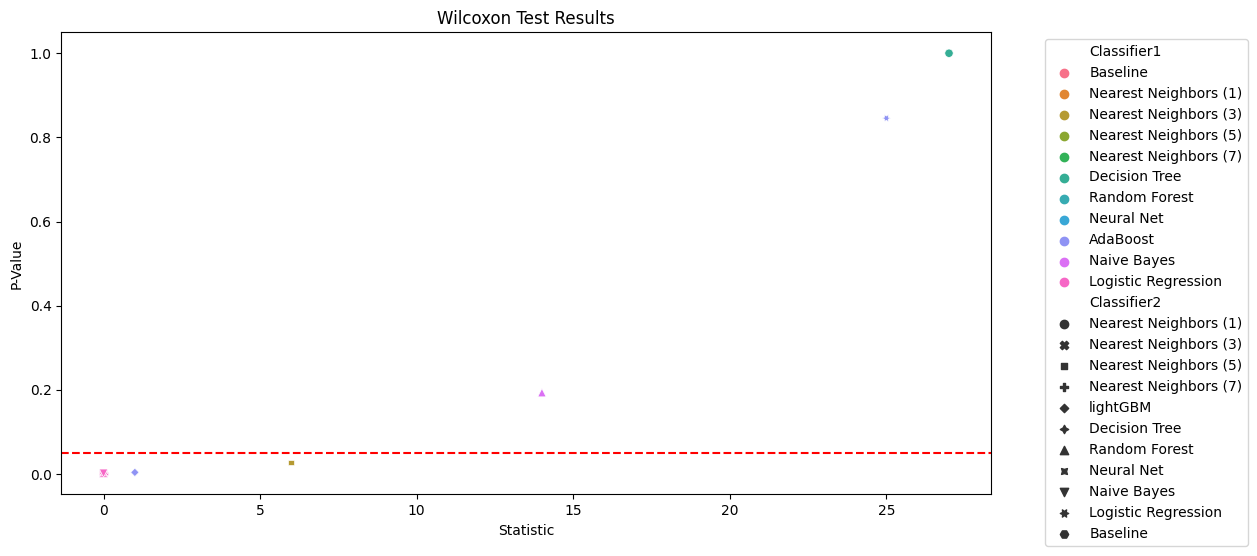

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes un diccionario 'valores_auc' con los resultados de AUC para cada clasificador
# y que cada clasificador ha sido entrenado y validado.

# Realizar la prueba de Wilcoxon para cada par de clasificadores y almacenar los resultados
wilcoxon_results = []

for name1 in valores_auc:
    for name2 in valores_auc:
        if name1 < name2:  # Esto asegura que cada par se compara solo una vez
            stat, p_value = wilcoxon(valores_auc[name1], valores_auc[name2])
            wilcoxon_results.append((name1, name2, stat, p_value))

# Convertir los resultados en un DataFrame para facilitar la visualización
import pandas as pd

results_df = pd.DataFrame(wilcoxon_results, columns=['Classifier1', 'Classifier2', 'Statistic', 'P-Value'])

# Graficar los resultados
plt.figure(figsize=(12, 6))
sns.scatterplot(data=results_df, x='Statistic', y='P-Value', hue='Classifier1', style='Classifier2')
plt.title('Wilcoxon Test Results')
plt.xlabel('Statistic')
plt.ylabel('P-Value')
plt.axhline(0.05, color='red', linestyle='--')  # Línea para el nivel de significancia alfa
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


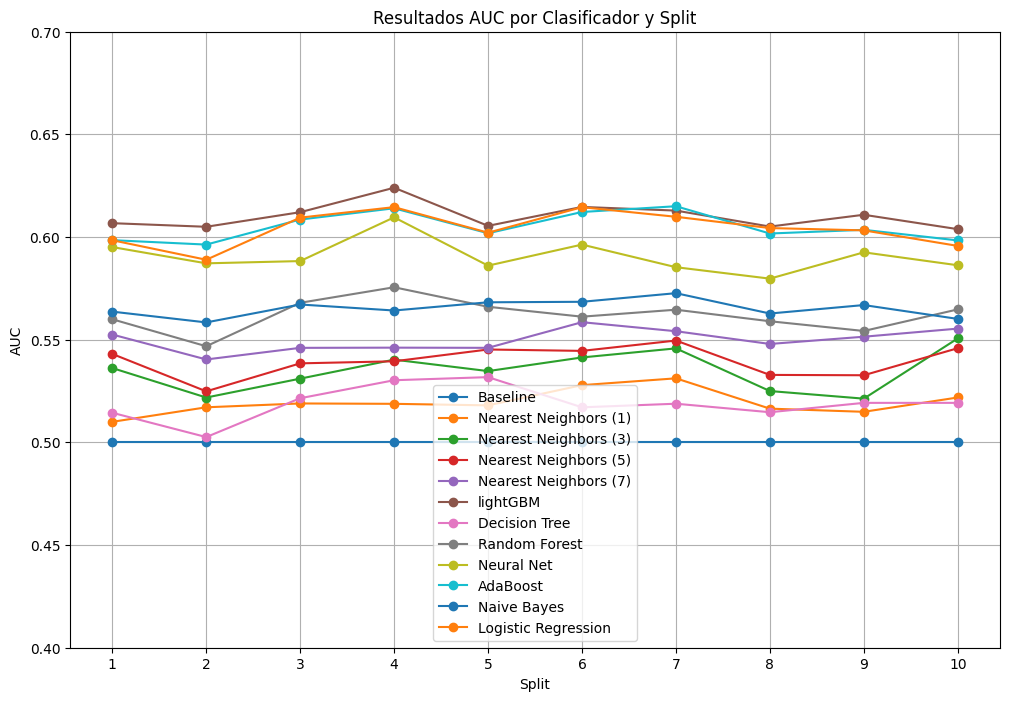

In [36]:
import matplotlib.pyplot as plt

# valores_auc es un diccionario donde las claves son los nombres de los clasificadores
# y los valores son listas de puntuaciones AUC para cada split
# Ejemplo: valores_auc = {'clasificador1': [0.8, 0.82, ...], 'clasificador2': [0.75, 0.77, ...], ...}

n_splits = 10  # Número de splits en la validación cruzada

plt.figure(figsize=(12, 8))

for name, auc_scores in valores_auc.items():
    plt.plot(range(1, n_splits + 1), auc_scores, marker='o', linestyle='-', label=name)

plt.title('Resultados AUC por Clasificador y Split')
plt.xlabel('Split')
plt.ylabel('AUC')
plt.xticks(range(1, n_splits + 1))
plt.ylim([0.4, 0.7])
plt.legend()
plt.grid(True)
plt.show()



{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]}
Baseline
ROC AREA CV: 0.5
 ROC AREA TEST: 0.5


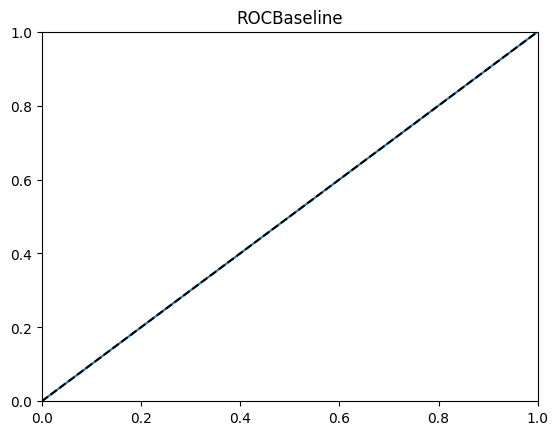

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.5100120435402925, 0.5170891663014144, 0.5189612931554216, 0.5187794756665105, 0.5180281760139942, 0.5278814337820051, 0.5311969545199776, 0.5164345669259467, 0.5148948196561965, 0.5218662399749711]}
Nearest Neighbors (1)
ROC AREA CV: 0.519514416953673
 ROC AREA TEST: 0.5210090420714341


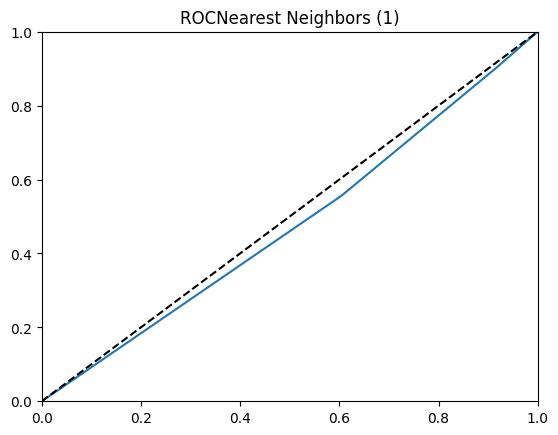

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.5100120435402925, 0.5170891663014144, 0.5189612931554216, 0.5187794756665105, 0.5180281760139942, 0.5278814337820051, 0.5311969545199776, 0.5164345669259467, 0.5148948196561965, 0.5218662399749711], 'Nearest Neighbors (3)': [0.5362013378754752, 0.5203042439976385, 0.5330964581032575, 0.5402983729325624, 0.5347238396937959, 0.5413667598498179, 0.5457845905019011, 0.5250032490821717, 0.5213002280679125, 0.5499995929005564]}
Nearest Neighbors (3)
ROC AREA CV: 0.5348078673005089
 ROC AREA TEST: 0.5389417135784781


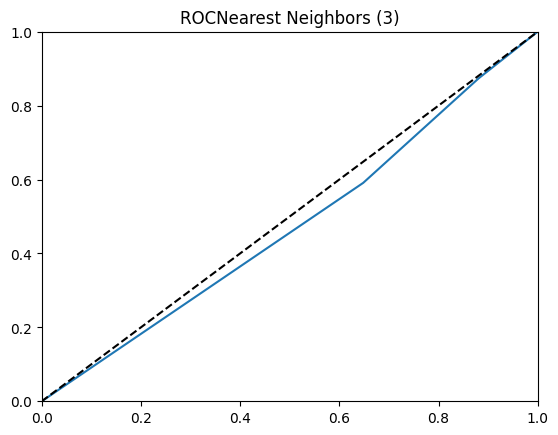

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.5100120435402925, 0.5170891663014144, 0.5189612931554216, 0.5187794756665105, 0.5180281760139942, 0.5278814337820051, 0.5311969545199776, 0.5164345669259467, 0.5148948196561965, 0.5218662399749711], 'Nearest Neighbors (3)': [0.5362013378754752, 0.5203042439976385, 0.5330964581032575, 0.5402983729325624, 0.5347238396937959, 0.5413667598498179, 0.5457845905019011, 0.5250032490821717, 0.5213002280679125, 0.5499995929005564], 'Nearest Neighbors (5)': [0.5430248902646829, 0.52486220508501, 0.5384893042469829, 0.5394939345056793, 0.5452414337991516, 0.5445631005179856, 0.5496010912313593, 0.5328649201329702, 0.5326978035627343, 0.5458696138006266]}
Nearest Neighbors (5)
ROC AREA CV: 0.5396708297147182
 ROC AREA TEST: 0.5459889609858539


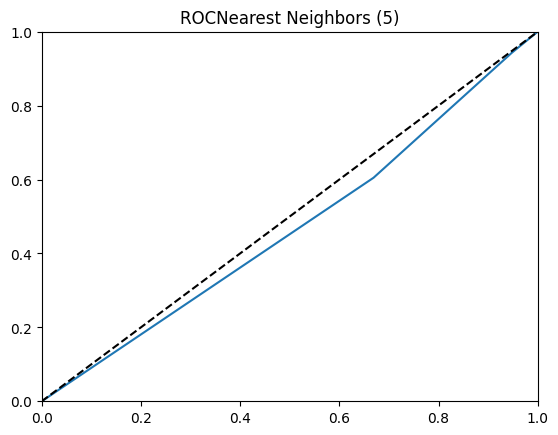

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.5100120435402925, 0.5170891663014144, 0.5189612931554216, 0.5187794756665105, 0.5180281760139942, 0.5278814337820051, 0.5311969545199776, 0.5164345669259467, 0.5148948196561965, 0.5218662399749711], 'Nearest Neighbors (3)': [0.5362013378754752, 0.5203042439976385, 0.5330964581032575, 0.5402983729325624, 0.5347238396937959, 0.5413667598498179, 0.5457845905019011, 0.5250032490821717, 0.5213002280679125, 0.5499995929005564], 'Nearest Neighbors (5)': [0.5430248902646829, 0.52486220508501, 0.5384893042469829, 0.5394939345056793, 0.5452414337991516, 0.5445631005179856, 0.5496010912313593, 0.5328649201329702, 0.5326978035627343, 0.5458696138006266], 'Nearest Neighbors (7)': [0.5525237121935251, 0.5403882964096963, 0.5460417120261077, 0.5461375384090165, 0.5448534014632923, 0.558536849332076, 0.5540758915626238, 0.5466570917527874, 0.5492132537498721, 0.5550157109798556]}
Nearest Neighbors (7)
ROC AREA

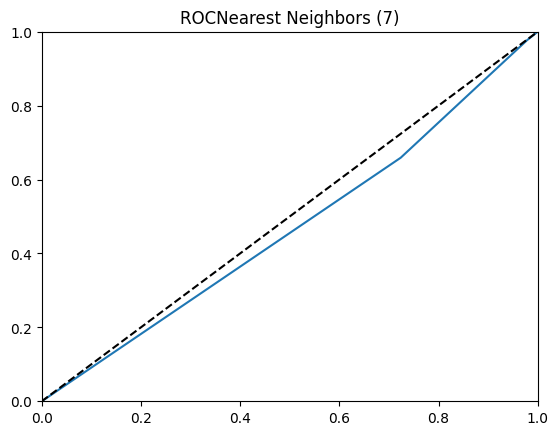

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 40023, number of used features: 14
[LightGBM] [Info] Start training from score -2.414650
[LightGBM] [Info] Start training from score -1.132537
[LightGBM] [Info] Start training from score -0.530371
{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.5100120435402925, 0.5170891663014144, 0.5189612931554216, 0.5187794756665105, 0.5180281760139942, 0.5278814337820051, 0.5311969545199776, 0.5164345669259467, 0.5148948196561965, 0.5218662399749711], 'Nearest Neighbors (3)': [0.5362013378754752, 0.5203042439976385, 0.5330964581032575, 0.5402983729325624, 0.5347238396937959, 0.5413667598498179, 0.5457845905019011, 0.5250032490821717, 0.521300

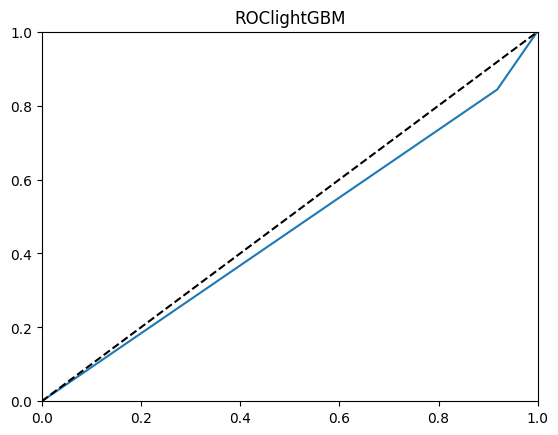

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.5100120435402925, 0.5170891663014144, 0.5189612931554216, 0.5187794756665105, 0.5180281760139942, 0.5278814337820051, 0.5311969545199776, 0.5164345669259467, 0.5148948196561965, 0.5218662399749711], 'Nearest Neighbors (3)': [0.5362013378754752, 0.5203042439976385, 0.5330964581032575, 0.5402983729325624, 0.5347238396937959, 0.5413667598498179, 0.5457845905019011, 0.5250032490821717, 0.5213002280679125, 0.5499995929005564], 'Nearest Neighbors (5)': [0.5430248902646829, 0.52486220508501, 0.5384893042469829, 0.5394939345056793, 0.5452414337991516, 0.5445631005179856, 0.5496010912313593, 0.5328649201329702, 0.5326978035627343, 0.5458696138006266], 'Nearest Neighbors (7)': [0.5525237121935251, 0.5403882964096963, 0.5460417120261077, 0.5461375384090165, 0.5448534014632923, 0.558536849332076, 0.5540758915626238, 0.5466570917527874, 0.5492132537498721, 0.5550157109798556], 'lightGBM': [0.606756458413377

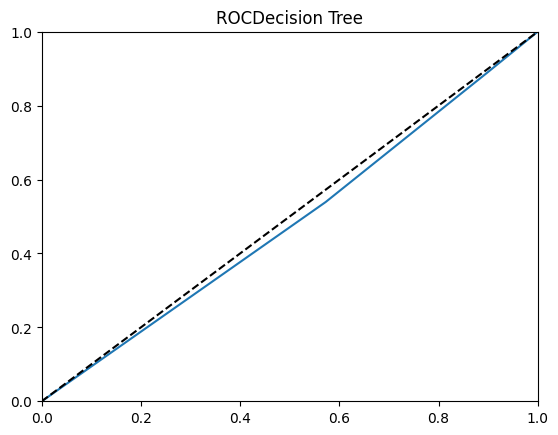

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.5100120435402925, 0.5170891663014144, 0.5189612931554216, 0.5187794756665105, 0.5180281760139942, 0.5278814337820051, 0.5311969545199776, 0.5164345669259467, 0.5148948196561965, 0.5218662399749711], 'Nearest Neighbors (3)': [0.5362013378754752, 0.5203042439976385, 0.5330964581032575, 0.5402983729325624, 0.5347238396937959, 0.5413667598498179, 0.5457845905019011, 0.5250032490821717, 0.5213002280679125, 0.5499995929005564], 'Nearest Neighbors (5)': [0.5430248902646829, 0.52486220508501, 0.5384893042469829, 0.5394939345056793, 0.5452414337991516, 0.5445631005179856, 0.5496010912313593, 0.5328649201329702, 0.5326978035627343, 0.5458696138006266], 'Nearest Neighbors (7)': [0.5525237121935251, 0.5403882964096963, 0.5460417120261077, 0.5461375384090165, 0.5448534014632923, 0.558536849332076, 0.5540758915626238, 0.5466570917527874, 0.5492132537498721, 0.5550157109798556], 'lightGBM': [0.606756458413377

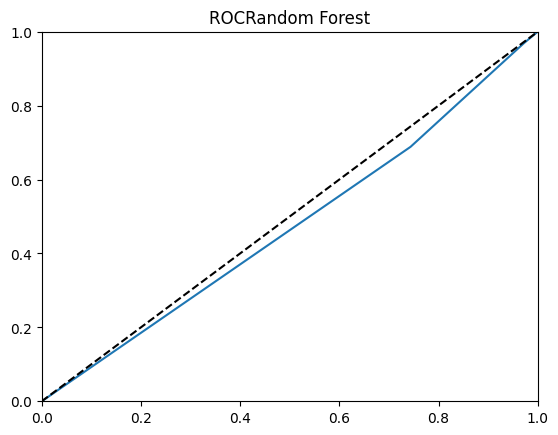

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.5100120435402925, 0.5170891663014144, 0.5189612931554216, 0.5187794756665105, 0.5180281760139942, 0.5278814337820051, 0.5311969545199776, 0.5164345669259467, 0.5148948196561965, 0.5218662399749711], 'Nearest Neighbors (3)': [0.5362013378754752, 0.5203042439976385, 0.5330964581032575, 0.5402983729325624, 0.5347238396937959, 0.5413667598498179, 0.5457845905019011, 0.5250032490821717, 0.5213002280679125, 0.5499995929005564], 'Nearest Neighbors (5)': [0.5430248902646829, 0.52486220508501, 0.5384893042469829, 0.5394939345056793, 0.5452414337991516, 0.5445631005179856, 0.5496010912313593, 0.5328649201329702, 0.5326978035627343, 0.5458696138006266], 'Nearest Neighbors (7)': [0.5525237121935251, 0.5403882964096963, 0.5460417120261077, 0.5461375384090165, 0.5448534014632923, 0.558536849332076, 0.5540758915626238, 0.5466570917527874, 0.5492132537498721, 0.5550157109798556], 'lightGBM': [0.606756458413377

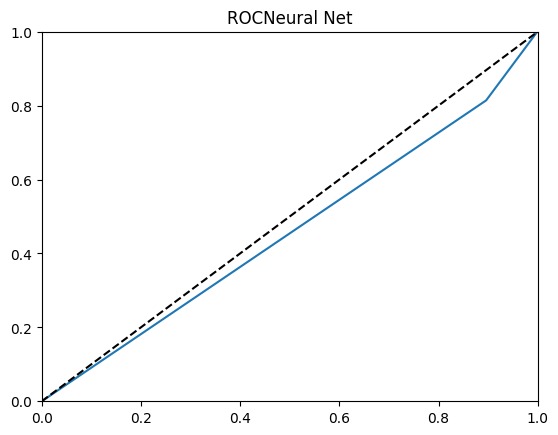

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.5100120435402925, 0.5170891663014144, 0.5189612931554216, 0.5187794756665105, 0.5180281760139942, 0.5278814337820051, 0.5311969545199776, 0.5164345669259467, 0.5148948196561965, 0.5218662399749711], 'Nearest Neighbors (3)': [0.5362013378754752, 0.5203042439976385, 0.5330964581032575, 0.5402983729325624, 0.5347238396937959, 0.5413667598498179, 0.5457845905019011, 0.5250032490821717, 0.5213002280679125, 0.5499995929005564], 'Nearest Neighbors (5)': [0.5430248902646829, 0.52486220508501, 0.5384893042469829, 0.5394939345056793, 0.5452414337991516, 0.5445631005179856, 0.5496010912313593, 0.5328649201329702, 0.5326978035627343, 0.5458696138006266], 'Nearest Neighbors (7)': [0.5525237121935251, 0.5403882964096963, 0.5460417120261077, 0.5461375384090165, 0.5448534014632923, 0.558536849332076, 0.5540758915626238, 0.5466570917527874, 0.5492132537498721, 0.5550157109798556], 'lightGBM': [0.606756458413377

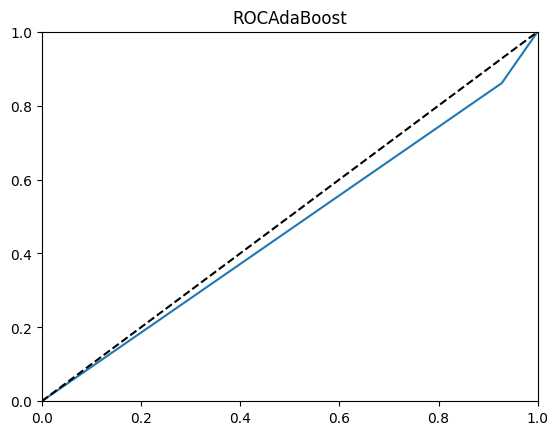

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.5100120435402925, 0.5170891663014144, 0.5189612931554216, 0.5187794756665105, 0.5180281760139942, 0.5278814337820051, 0.5311969545199776, 0.5164345669259467, 0.5148948196561965, 0.5218662399749711], 'Nearest Neighbors (3)': [0.5362013378754752, 0.5203042439976385, 0.5330964581032575, 0.5402983729325624, 0.5347238396937959, 0.5413667598498179, 0.5457845905019011, 0.5250032490821717, 0.5213002280679125, 0.5499995929005564], 'Nearest Neighbors (5)': [0.5430248902646829, 0.52486220508501, 0.5384893042469829, 0.5394939345056793, 0.5452414337991516, 0.5445631005179856, 0.5496010912313593, 0.5328649201329702, 0.5326978035627343, 0.5458696138006266], 'Nearest Neighbors (7)': [0.5525237121935251, 0.5403882964096963, 0.5460417120261077, 0.5461375384090165, 0.5448534014632923, 0.558536849332076, 0.5540758915626238, 0.5466570917527874, 0.5492132537498721, 0.5550157109798556], 'lightGBM': [0.606756458413377

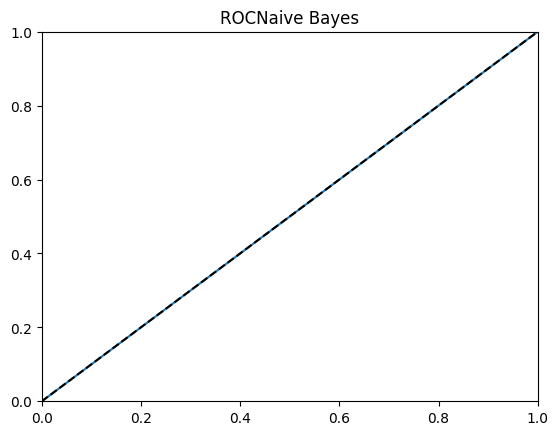

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.5100120435402925, 0.5170891663014144, 0.5189612931554216, 0.5187794756665105, 0.5180281760139942, 0.5278814337820051, 0.5311969545199776, 0.5164345669259467, 0.5148948196561965, 0.5218662399749711], 'Nearest Neighbors (3)': [0.5362013378754752, 0.5203042439976385, 0.5330964581032575, 0.5402983729325624, 0.5347238396937959, 0.5413667598498179, 0.5457845905019011, 0.5250032490821717, 0.5213002280679125, 0.5499995929005564], 'Nearest Neighbors (5)': [0.5430248902646829, 0.52486220508501, 0.5384893042469829, 0.5394939345056793, 0.5452414337991516, 0.5445631005179856, 0.5496010912313593, 0.5328649201329702, 0.5326978035627343, 0.5458696138006266], 'Nearest Neighbors (7)': [0.5525237121935251, 0.5403882964096963, 0.5460417120261077, 0.5461375384090165, 0.5448534014632923, 0.558536849332076, 0.5540758915626238, 0.5466570917527874, 0.5492132537498721, 0.5550157109798556], 'lightGBM': [0.606756458413377

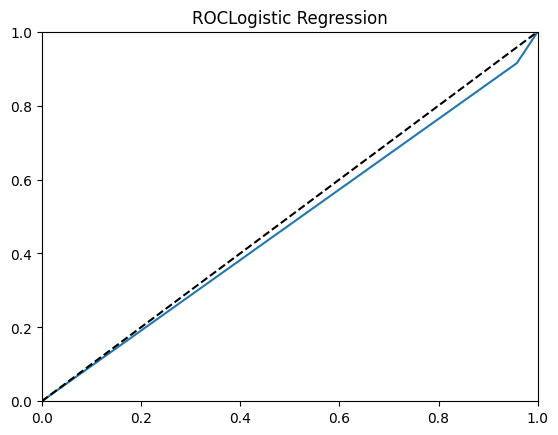

In [37]:
valores_auc={}

for name, model in classifiers_list:
  stratified_kfold = StratifiedKFold(n_splits=10,
                                        shuffle=True,
                                        random_state=11)

  param_grid = {}
  grid_search = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='roc_auc_ovr',
                            cv=stratified_kfold,
                            n_jobs=-1)

  grid_search.fit(X_train, y_train)
  valores_auc[name]=[grid_search.cv_results_['split0_test_score'][0],grid_search.cv_results_['split1_test_score'][0],grid_search.cv_results_['split2_test_score'][0],grid_search.cv_results_['split3_test_score'][0],grid_search.cv_results_['split4_test_score'][0],grid_search.cv_results_['split5_test_score'][0],grid_search.cv_results_['split6_test_score'][0],grid_search.cv_results_['split7_test_score'][0],grid_search.cv_results_['split8_test_score'][0],grid_search.cv_results_['split9_test_score'][0]]
  print(valores_auc)
  cv_score = grid_search.best_score_
  test_score = grid_search.score(X_test, y_test)
  print(f'{name}\nROC AREA CV: {cv_score}\n ROC AREA TEST: {test_score}')
  y_pred=grid_search.predict(X_test)
  roc = roc_curve(y_test, y_pred, pos_label=1)
  sns.lineplot(x=roc[0], y=roc[1])
  sns.lineplot(x=[0,1], y=[0,1], linestyle='--', color='black')
  plt.xlim([0,1])
  plt.ylim([0,1])
  plt.title("ROC"+name)
  plt.show()

Baseline
 accuracy CV: 0.588386683500618
 accuracy TEST: 0.5909753395907421


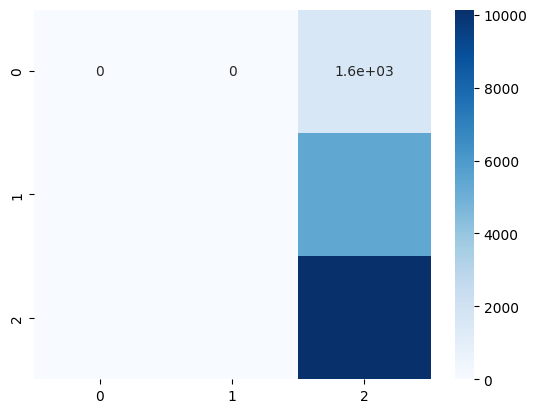

Nearest Neighbors (1)
 accuracy CV: 0.4819980841455365
 accuracy TEST: 0.48288929050311896


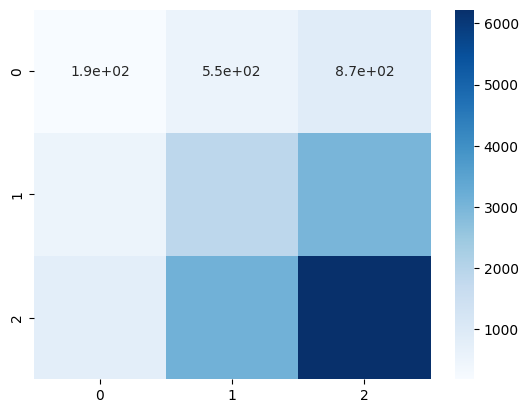

Nearest Neighbors (3)
 accuracy CV: 0.48649541080072006
 accuracy TEST: 0.49373287471579314


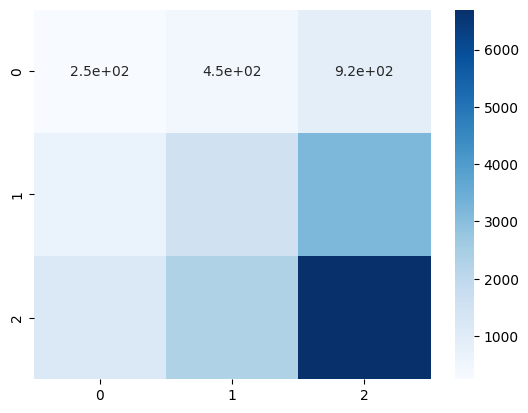

Nearest Neighbors (5)
 accuracy CV: 0.5167028776393717
 accuracy TEST: 0.5162362268990847


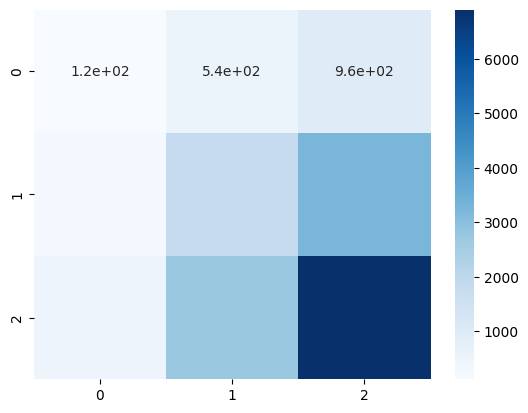

Nearest Neighbors (7)
 accuracy CV: 0.5392897293546582
 accuracy TEST: 0.5373404069259021


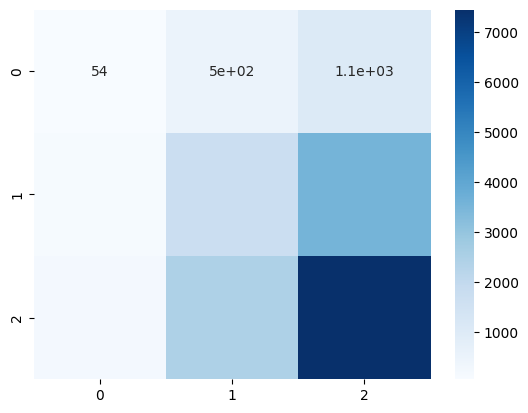

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 40023, number of used features: 14
[LightGBM] [Info] Start training from score -2.414650
[LightGBM] [Info] Start training from score -1.132537
[LightGBM] [Info] Start training from score -0.530371
lightGBM
 accuracy CV: 0.5969818613051705
 accuracy TEST: 0.5983792922520842


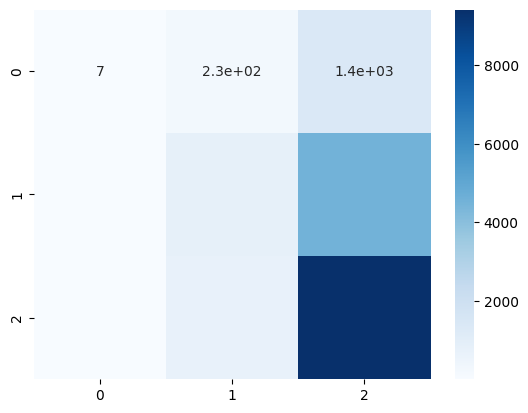

Decision Tree
 accuracy CV: 0.46833096691724085
 accuracy TEST: 0.466798810703667


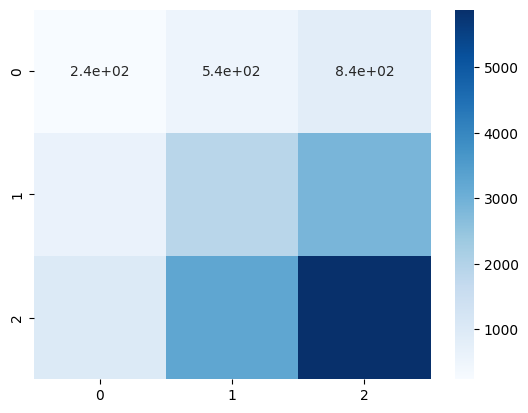

Random Forest
 accuracy CV: 0.5430126805195954
 accuracy TEST: 0.5419460152742961


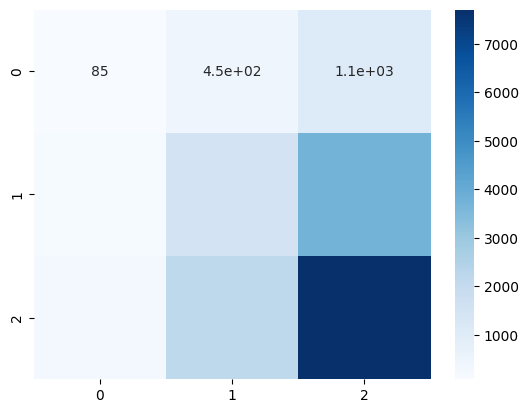

Neural Net
 accuracy CV: 0.5884613463940026
 accuracy TEST: 0.5971550166151693


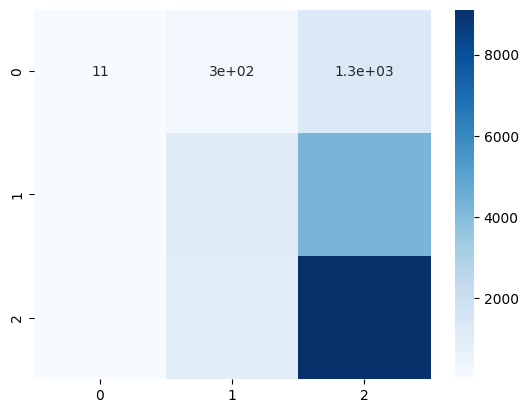

AdaBoost
 accuracy CV: 0.5955326171538263
 accuracy TEST: 0.6000699586078238


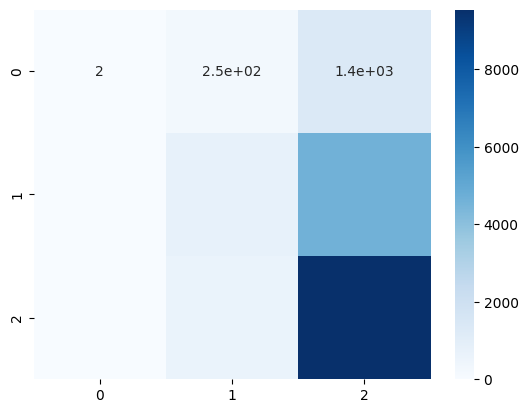

Naive Bayes
 accuracy CV: 0.3222896358465783
 accuracy TEST: 0.31498863172622865


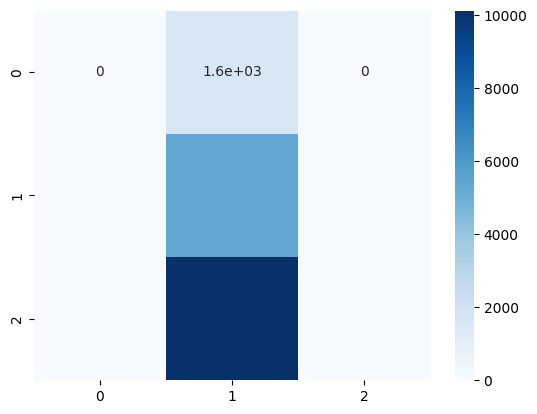

Logistic Regression
 accuracy CV: 0.594033485380717
 accuracy TEST: 0.597621407333994


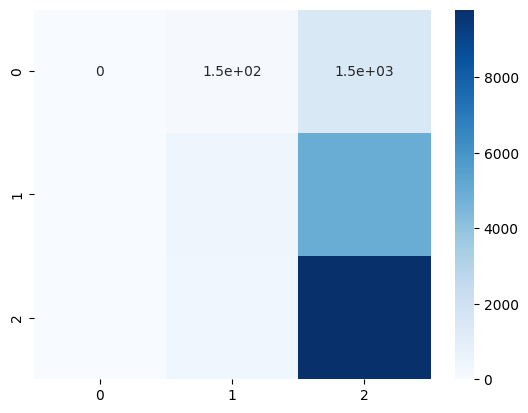

In [38]:
valores_acc={}
for name, model in classifiers_list:
  stratified_kfold = StratifiedKFold(n_splits=10,
                                        shuffle=True,
                                        random_state=11)

  param_grid = {}
  grid_search = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=stratified_kfold,
                            n_jobs=-1)

  grid_search.fit(X_train, y_train)
  valores_acc[name]=[grid_search.cv_results_['split0_test_score'][0],grid_search.cv_results_['split1_test_score'][0],grid_search.cv_results_['split2_test_score'][0],grid_search.cv_results_['split3_test_score'][0],grid_search.cv_results_['split4_test_score'][0],grid_search.cv_results_['split5_test_score'][0],grid_search.cv_results_['split6_test_score'][0],grid_search.cv_results_['split7_test_score'][0],grid_search.cv_results_['split8_test_score'][0],grid_search.cv_results_['split9_test_score'][0]]
  cv_score = grid_search.best_score_
  test_score = grid_search.score(X_test, y_test)
  print(f'{name}\n accuracy CV: {cv_score}\n accuracy TEST: {test_score}')
  prediction_clf=grid_search.predict(X_test)
  cm = confusion_matrix(y_test, prediction_clf)
  sns.heatmap(cm, annot=True,cmap="Blues")
  plt.show()